In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import *
import pandas as pd
from csv import reader
from csv import writer
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
import seaborn as sns

In [2]:
df_white = pd.read_csv('winequality-white1.csv', ';')
actual_quality_w = np.asarray(df_white.quality)
actual_quality_w_test = actual_quality_w[round(len(actual_quality_w)*0.8):] 
actual_Quality_w = np.asarray(df_white.Quality)
actual_Quality_w_test = actual_Quality_w[round(len(actual_Quality_w)*0.8):] 
full_data_w = np.asarray(df_white)
df_white = df_white.drop(labels='quality', axis=1)
df_white = df_white.drop(labels='Quality', axis=1)
#print(full_data_w)




df_red = pd.read_csv('winequality-red1.csv', ';')
actual_quality_r = np.asarray(df_red.quality)
actual_quality_r_test = actual_quality_r[round(len(actual_quality_r)*0.8):] 
actual_Quality_r = np.asarray(df_red.Quality)
actual_Quality_r_test = actual_Quality_r[round(len(actual_Quality_r)*0.8):] 
full_data_r = np.asarray(df_red)
df_red = df_red.drop(labels='quality', axis=1)
df_red = df_red.drop(labels='Quality', axis=1)
#print(full_data_r)

In [3]:
#Scatter Plot Matrices
#spm_white = pd.plotting.scatter_matrix(df_white, alpha=0.2, figsize=(25, 25), hist_kwds={'bins':30})
#spm_red = pd.plotting.scatter_matrix(df_red, alpha=0.2, figsize=(25, 25), hist_kwds={'bins':30})

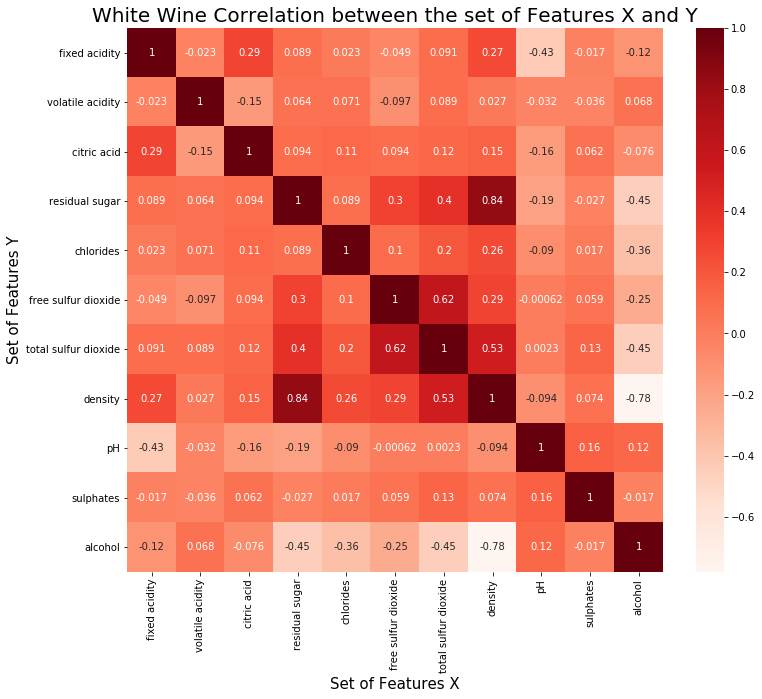

In [4]:
# Correlation between features for White Wine
plt.figure(figsize=(12,10))
correlation = df_white.corr()
sns.heatmap(correlation , annot=True, cmap=plt.cm.Reds)
plt.title('White Wine Correlation between the set of Features X and Y', fontsize = 20) # title with fontsize 20
plt.xlabel('Set of Features X', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Set of Features Y', fontsize = 15) # y-axis label with fontsize 15
plt.show()

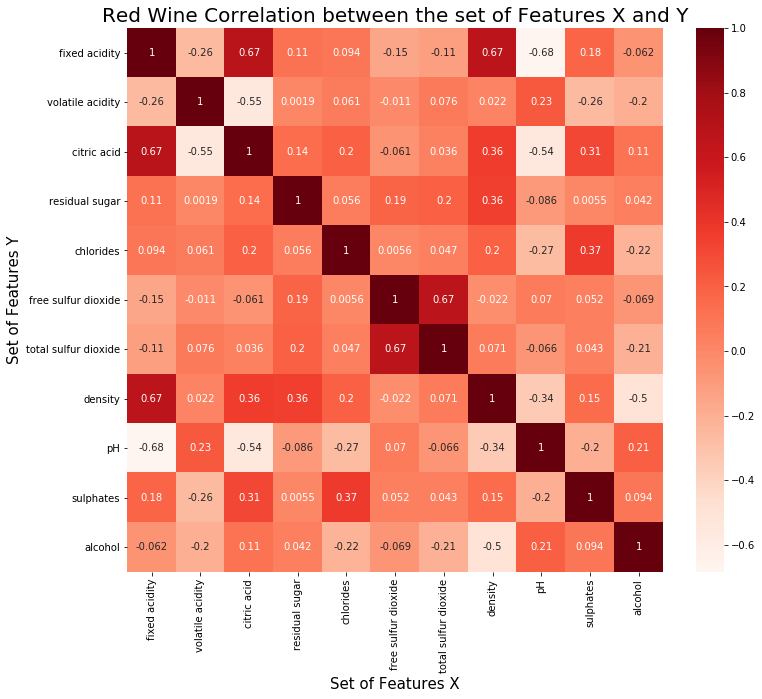

In [5]:
# Correlation between features for Red Wine
plt.figure(figsize=(12,10))
correlation_r = df_red.corr()
sns.heatmap(correlation_r , annot=True, cmap=plt.cm.Reds)
plt.title('Red Wine Correlation between the set of Features X and Y', fontsize = 20) # title with fontsize 20
plt.xlabel('Set of Features X', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Set of Features Y', fontsize = 15) # y-axis label with fontsize 15
plt.show()

In [6]:
# Split data

# red wine
r_train = full_data_r[:round(len(full_data_r)*0.6)]
r_valid = full_data_r[round(len(full_data_r)*0.6):round(len(full_data_r)*0.8)]
r_test  = full_data_r[round(len(full_data_r)*0.8):]  

# white wine
w_train = full_data_w[:round(len(full_data_w)*0.6)]
w_valid = full_data_w[round(len(full_data_w)*0.6):round(len(full_data_w)*0.8)]
w_test  = full_data_w[round(len(full_data_w)*0.8):]  

In [7]:
# method to split the dataset by class values, returns a dictionary
def separate(data):
    separated = dict()
    for i in range(len(data)):
        row = data[i]
        class_value = row[-2]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(row)
    return separated


In [8]:
# 1. seperate the training data by class 
separated_r_train = separate(r_train)
separated_w_train = separate(w_train)

# print white keys
#print('White Wine keys: ', separated_w_train.keys())

# print red keys
#print('Red Wine keys: ', separated_r_train.keys())

In [9]:
# Calculate the mean of a list of numbers
mean = lambda x: sum(x)/float(len(x))
 
# Calculate the standard deviation of a list of numbers
def stdev(features):
    avg = np.mean(features)
    variance = sum([(x-avg)**2 for x in features]) / float(len(features)-1)
    return sqrt(variance)

 
# Method for calculating the mean, stdev and count for each column in a dataset
# zip() function maps the similar index of multiple containers, so that they can be used as a single entity
# * operator unpacks dataset i.e. transforms list of lists --> separate lists for each row 
# we delete the last column, as this is the column we are trying to predict(do not need summary statistics for it)
def calc_summary_stats(data):
    summaries = list()
    for col in zip(*data):
        summaries.append([mean(col), stdev(col), len(col)])
    del(summaries[-1])
    del(summaries[-1])
    return np.asarray(summaries)

In [10]:
# 2. Summary of whole training data , printed : mean, standard deviation, count
# has 11 columns output as 11 rows repr. the input features

# White Wine
print('Whole data summary White Wine: ')
print('Mean; Standard Deviation; Number of Instances')
summaries_wTrain = calc_summary_stats(w_train)
for col in summaries_wTrain:
    print(col)
    
print('\n')

# Red Wine
print('Whole data summary Red Wine: ')
print('Mean; Standard Deviation; Number of Instances')
summaries_rTrain = calc_summary_stats(r_train)
for col in summaries_rTrain:
    print(col)

Whole data summary White Wine: 
Mean; Standard Deviation; Number of Instances
[7.05275604e+00 8.59815524e-01 2.93900000e+03]
[2.78482477e-01 1.02809300e-01 2.93900000e+03]
[3.47274583e-01 1.27875329e-01 2.93900000e+03]
[   6.36250425    5.18310958 2939.        ]
[4.67526370e-02 2.29390761e-02 2.93900000e+03]
[  35.36100715   16.76674936 2939.        ]
[ 144.60190541   44.01587733 2939.        ]
[9.94569884e-01 2.91542814e-03 2.93900000e+03]
[3.20755359e+00 1.54794612e-01 2.93900000e+03]
[4.91571963e-01 1.15645608e-01 2.93900000e+03]
[1.02739367e+01 1.12044609e+00 2.93900000e+03]


Whole data summary Red Wine: 
Mean; Standard Deviation; Number of Instances
[  8.7468196    1.84701638 959.        ]
[5.30891554e-01 1.79348778e-01 9.59000000e+02]
[2.95505735e-01 2.01727740e-01 9.59000000e+02]
[  2.59963504   1.25211194 959.        ]
[9.08706986e-02 5.08169991e-02 9.59000000e+02]
[ 15.15015641   9.88592964 959.        ]
[ 48.91240876  33.35731528 959.        ]
[9.97402127e-01 1.77383566e-03 

In [11]:
# 3. Summarize data using  according to class value

# Method for summarizing the dataset, and then organising these summaries by class values
# Utilises calc_summary_stats() and separate() functions
# Split dataset by class then calculate statistics for each row
def summary_stats_by_class(data):
    separated = separate(data)
    summaries = dict()
    for class_value, rows in separated.items():           # separated.items() returns key:value pairs from dictionary
        summaries[class_value] = calc_summary_stats(rows)
    return summaries

In [12]:
# Summary of white wine training data according to class values
summary_wTrain = summary_stats_by_class(w_train)
for class_value in summary_wTrain:
    print('\n')
    print('Class Value: ', class_value)
    print('Mean; Standard Deviation; Number of Instances')
    for row in summary_wTrain[class_value]:
        print(row)
        



Class Value:  6.0
Mean; Standard Deviation; Number of Instances
[7.06253061e+00 8.58504721e-01 1.22500000e+03]
[2.57714286e-01 8.67345134e-02 1.22500000e+03]
[3.52693878e-01 1.25156471e-01 1.22500000e+03]
[   6.23171429    5.24837357 1225.        ]
[4.66457143e-02 2.11762415e-02 1.22500000e+03]
[  36.11387755   15.6487268  1225.        ]
[ 146.23142857   42.71483705 1225.        ]
[9.94549559e-01 2.96934993e-03 1.22500000e+03]
[3.21526531e+00 1.54778301e-01 1.22500000e+03]
[4.95502041e-01 1.12051270e-01 1.22500000e+03]
[1.02933061e+01 1.01784130e+00 1.22500000e+03]


Class Value:  5.0
Mean; Standard Deviation; Number of Instances
[7.06797927e+00 8.63311414e-01 9.65000000e+02]
[3.02689119e-01 1.04428631e-01 9.65000000e+02]
[3.47927461e-01 1.48113500e-01 9.65000000e+02]
[  7.55181347   5.41833221 965.        ]
[5.11512953e-02 2.73053639e-02 9.65000000e+02]
[ 36.33782383  18.23941373 965.        ]
[153.28031088  45.61756875 965.        ]
[9.95622995e-01 2.47668477e-03 9.65000000e+02]
[3

In [13]:
# Summary of red wine training data according to class values
summary_rTrain = summary_stats_by_class(r_train)

for class_value in summary_rTrain:
    print('\n')
    print('Class Value: ', class_value)
    print('Mean; Standard Deviation; Number of Instances')
    for row in summary_rTrain[class_value]:
        print(row)



Class Value:  5.0
Mean; Standard Deviation; Number of Instances
[  8.43688889   1.64754501 450.        ]
[5.74333333e-01 1.66809441e-01 4.50000000e+02]
[2.63822222e-01 1.85862378e-01 4.50000000e+02]
[  2.56822222   1.23602709 450.        ]
[9.36244444e-02 5.41546809e-02 4.50000000e+02]
[ 16.15555556  10.32340208 450.        ]
[ 59.55111111  38.28143713 450.        ]
[9.97530044e-01 1.47601899e-03 4.50000000e+02]
[3.29984444e+00 1.53639507e-01 4.50000000e+02]
[6.3440000e-01 1.8050713e-01 4.5000000e+02]
[  9.80333333   0.67478447 450.        ]


Class Value:  6.0
Mean; Standard Deviation; Number of Instances
[  8.92643678   1.89795642 348.        ]
[4.95905172e-01 1.59746646e-01 3.48000000e+02]
[3.03821839e-01 2.00690573e-01 3.48000000e+02]
[  2.57227011   1.28531375 348.        ]
[9.03620690e-02 4.48722291e-02 3.48000000e+02]
[ 14.7183908    9.05266409 348.        ]
[ 41.56896552  25.02122124 348.        ]
[9.97475029e-01 1.84777247e-03 3.48000000e+02]
[3.29873563e+00 1.59316296e-01 3

In [14]:
# 5. Determining Class Probabilities
# will use statistics calculated from our training data to calculate probabilities for new data
def confuz(arr1,arr2):
    mx = np.zeros((10,10))
    for k in range(len(arr1)):
        mx[int(arr1[k])][int(arr2[k])] = mx[int(arr1[k])][int(arr2[k])]+1
    return(mx)

In [15]:
# Method to calculate the Gaussian Probability Distribution Function
def calc_Gaussian_pdf(x, mean, std_dev):
    exponent = exp(-((x-mean)**2 / (2 * std_dev**2 )))
    pdf = (1 / (sqrt(2 * pi) * std_dev)) * exponent
    return pdf

# Calculate the probabilities of predicting each class for a given row
# summaries will come in as [mean, stdev, len]
def class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calc_Gaussian_pdf(row[i], mean, stdev)
    return probabilities
 


In [16]:
# Naive Bayes on red wine

#some summary statistics for red wine on the training data
total_rows_red = len(r_train)
print('red wine summary statistics for r_train')
print('\n')
print('Number of rows in r_train: ', total_rows_red)

for class_value, class_summaries in summary_rTrain.items():
    print('\n')
    print('class_value: ', class_value)
    print('Number of different instances corresponding to class_value: ', summary_rTrain[class_value][0][2]) 
    
summary_r = summary_stats_by_class(r_train)
predictions_red_test = list()
for datapoint in r_test:
    prob_red_train = class_probabilities(summary_r, datapoint)
    best_classValue_r = None
    best_prob_r = -1
    for classValue, prob in prob_red_train.items():
        if best_classValue_r is None or prob > best_prob_r:
            best_prob_r = prob
            best_classValue_r = classValue
    predictions_red_test.append(best_classValue_r)
        
print('\n')
print('Class Probabilites for Red Wine:', prob_red_train)
print('\n')
print(predictions_red_test)
print('\n')

# convert predictions_red_test to match 'Quality' column
final_predictions_red = list()
for value in predictions_red_test:
    if value <= 4:
        final_predictions_red.append(1)
    elif 4 < value <= 7:
        final_predictions_red.append(2)
    else:
        final_predictions_red.append(3)
        
print(final_predictions_red)

red wine summary statistics for r_train


Number of rows in r_train:  959


class_value:  5.0
Number of different instances corresponding to class_value:  450.0


class_value:  6.0
Number of different instances corresponding to class_value:  348.0


class_value:  7.0
Number of different instances corresponding to class_value:  114.0


class_value:  4.0
Number of different instances corresponding to class_value:  32.0


class_value:  8.0
Number of different instances corresponding to class_value:  10.0


class_value:  3.0
Number of different instances corresponding to class_value:  5.0


Class Probabilites for Red Wine: {5.0: 0.0009741624777621157, 6.0: 0.008616264267641708, 7.0: 0.00830405133965112, 4.0: 4.644628686237247e-05, 8.0: 0.0009125084397441456, 3.0: 1.0435193906269129e-06}


[7.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 7.0, 7.0, 5.0, 5.0, 6.0, 6.0, 8.0, 5.0, 6.0, 5.0, 5.0, 7.0, 7.0, 4.0, 8.0, 6.0, 7.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 7.0, 4.0, 5.0, 5.0, 5.0, 4.0, 7.0, 5.0, 4.0

In [17]:
conf_mat_red = confusion_matrix(actual_quality_r_test, predictions_red_test) 
print('\n')
print('Red Wine')
print ('Confusion Matrix :')
print(conf_mat_red) 
print ('Accuracy Score :',accuracy_score(actual_quality_r_test, predictions_red_test)) 
print ('Report : ')
print (classification_report(actual_quality_r_test, predictions_red_test)) 

conf_mat_red = confusion_matrix(actual_Quality_r_test, final_predictions_red) 
print('\n')
print('Red Wine')
print ('Confusion Matrix :')
print(conf_mat_red) 
print ('Accuracy Score :',accuracy_score(actual_Quality_r_test, final_predictions_red)) 
print ('Report : ')
print (classification_report(actual_Quality_r_test, final_predictions_red)) 



Red Wine
Confusion Matrix :
[[ 0  2  3  0  0  0]
 [ 0  2  5  4  0  0]
 [ 0  3 97 38  5  0]
 [ 0  8 37 66 22  3]
 [ 0  0  3  8  9  2]
 [ 0  0  0  1  2  0]]
Accuracy Score : 0.54375
Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.13      0.18      0.15        11
           5       0.67      0.68      0.67       143
           6       0.56      0.49      0.52       136
           7       0.24      0.41      0.30        22
           8       0.00      0.00      0.00         3

    accuracy                           0.54       320
   macro avg       0.27      0.29      0.27       320
weighted avg       0.56      0.54      0.55       320



Red Wine
Confusion Matrix :
[[  4  12   0]
 [ 11 285   5]
 [  0   3   0]]
Accuracy Score : 0.903125
Report : 
              precision    recall  f1-score   support

           1       0.27      0.25      0.26        16
           2       0.95      0.95      0.95 

C:\Users\Mike\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


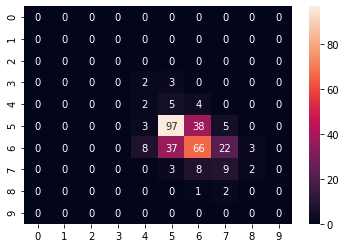

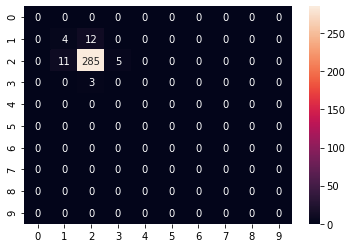

In [18]:
def confu1(arr1,arr2):
    mx = np.zeros((4,4))
    for k in range(len(arr1)):
        mx[int(arr1[k])][int(arr2[k])] = mx[int(arr1[k])][int(arr2[k])]+1
    return(mx)

confuzmc_red_quality = confuz(actual_quality_r_test, predictions_red_test)

df_cm_rq = pd.DataFrame(confuzmc_red_quality, range(10), range(10))
sns.heatmap(df_cm_rq, annot=True)
plt.show()


confuzmc_red_Quality = confuz(actual_Quality_r_test, final_predictions_red)

df_cm_rQ = pd.DataFrame(confuzmc_red_Quality, range(10), range(10))
sns.heatmap(df_cm_rQ, annot=True, fmt='g')
plt.show()

In [19]:
# Naive Bayes on White Wine

#some summary statistics for white wine on the training data
total_rows_white = len(w_train)
print('\n')
print('white wine summary statistics for w_train')
print('Number of rows in w_train: ', total_rows_white)

for class_value, class_summaries in summary_wTrain.items():
    print('\n')
    print('class_value: ', class_value)
    print('Number of different instances corresponding to class_value: ', summary_wTrain[class_value][0][2]) 
    
summary_w = summary_stats_by_class(w_train)
predictions_white_test = list()
for datapoint in w_test:
    prob_white_train = class_probabilities(summary_w, datapoint)
    best_classValue_w = None
    best_prob_w = -1
    for classValue, prob in prob_white_train.items():
        if best_classValue_w is None or prob > best_prob_w:
            best_prob_w = prob
            best_classValue_w = classValue
    predictions_white_test.append(best_classValue_w)
        
print('\n')
print('Class Probabilites for White Wine:', prob_white_train)
print('\n')
print(predictions_white_test)
print('\n')

# convert predictions_red_test to match 'Quality' column
final_predictions_white = list()
for value in predictions_white_test:
    if value <= 4:
        final_predictions_white.append(1)
    elif 4 < value <= 7:
        final_predictions_white.append(2)
    else:
        final_predictions_white.append(3)
        
print(final_predictions_white)



white wine summary statistics for w_train
Number of rows in w_train:  2939


class_value:  6.0
Number of different instances corresponding to class_value:  1225.0


class_value:  5.0
Number of different instances corresponding to class_value:  965.0


class_value:  7.0
Number of different instances corresponding to class_value:  506.0


class_value:  8.0
Number of different instances corresponding to class_value:  107.0


class_value:  4.0
Number of different instances corresponding to class_value:  117.0


class_value:  3.0
Number of different instances corresponding to class_value:  14.0


class_value:  9.0
Number of different instances corresponding to class_value:  5.0


Class Probabilites for White Wine: {6.0: 0.00035841120229137413, 5.0: 2.0800377462589146e-06, 7.0: 0.0024044345968122376, 8.0: 0.0010825344099670807, 4.0: 2.280840102755579e-06, 3.0: 2.722165448262912e-07, 9.0: 0.0003160992980581143}


[7.0, 7.0, 7.0, 5.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 5.0, 5.0, 7.0, 7.0, 7.0, 6.

In [20]:
conf_mat_white = confusion_matrix(actual_quality_w_test, predictions_white_test) 
print('\n')
print('White Wine')
print ('Confusion Matrix :')
print(conf_mat_white) 
print ('Accuracy Score :',accuracy_score(actual_quality_w_test, predictions_white_test)) 
print ('Report : ')
print (classification_report(actual_quality_w_test, predictions_white_test)) 

conf_mat_white = confusion_matrix(actual_Quality_w_test, final_predictions_white) 
print('\n')
print('White Wine')
print ('Confusion Matrix :')
print(conf_mat_white) 
print ('Accuracy Score :',accuracy_score(actual_Quality_w_test, final_predictions_white)) 
print ('Report : ')
print (classification_report(actual_Quality_w_test, final_predictions_white)) 



White Wine
Confusion Matrix :
[[  1   0   0   0   0   0   0]
 [  0   8   8   3   5   1   0]
 [  4   6 139  82  35   0   0]
 [  1   7 102 122 277   8   0]
 [  0   0  18  15 110   7   1]
 [  0   0   8   1  10   0   1]
 [  0   0   0   0   0   0   0]]
Accuracy Score : 0.3877551020408163
Report : 
              precision    recall  f1-score   support

         3.0       0.17      1.00      0.29         1
         4.0       0.38      0.32      0.35        25
         5.0       0.51      0.52      0.51       266
         6.0       0.55      0.24      0.33       517
         7.0       0.25      0.73      0.37       151
         8.0       0.00      0.00      0.00        20
         9.0       0.00      0.00      0.00         0

    accuracy                           0.39       980
   macro avg       0.26      0.40      0.26       980
weighted avg       0.47      0.39      0.38       980



White Wine
Confusion Matrix :
[[  9  16   1]
 [ 18 900  16]
 [  0  19   1]]
Accuracy Score : 0.9285714285

C:\Users\Mike\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


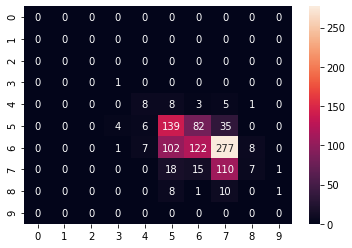

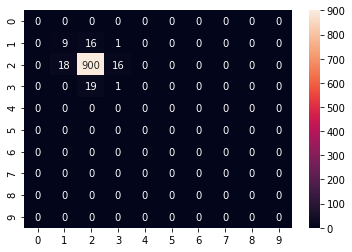

In [21]:
confuzmc_white_quality = confuz(actual_quality_w_test, predictions_white_test)

df_cm_wq = pd.DataFrame(confuzmc_white_quality, range(10), range(10))
sns.heatmap(df_cm_wq, annot=True, fmt='g')
plt.show()


confuzmc_white_Quality = confuz(actual_Quality_w_test, final_predictions_white)

df_cm_wQ = pd.DataFrame(confuzmc_white_Quality, range(10), range(10))
sns.heatmap(df_cm_wQ, annot=True, fmt='g')
plt.show()

In [22]:
# drop correlated features for red wine to see improved accuracy and repeat Naive Bayes
df_red = pd.read_csv('winequality-red1.csv', ';')
actual_quality_r = np.asarray(df_red.quality)
actual_quality_r_test = actual_quality_r[round(len(actual_quality_r)*0.8):] 
actual_Quality_r = np.asarray(df_red.Quality)
actual_Quality_r_test = actual_Quality_r[round(len(actual_Quality_r)*0.8):]
df_red = df_red.drop(labels='citric acid', axis=1)
df_red = df_red.drop(labels='fixed acidity', axis=1)
df_red = df_red.drop(labels='density', axis=1)
#df_red = df_red.drop(labels='total sulfur dioxide', axis=1)
#df_red = df_red.drop(labels='free sulfur dioxide', axis=1)
full_data_r = np.asarray(df_red)
#df_red = df_red.drop(labels='quality', axis=1)
df_red = df_red.drop(labels='Quality', axis=1)

In [23]:
df_red.columns

Index(['volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

In [24]:
r_train = full_data_r[:round(len(full_data_r)*0.6)]
r_valid = full_data_r[round(len(full_data_r)*0.6):round(len(full_data_r)*0.8)]
r_test  = full_data_r[round(len(full_data_r)*0.8):] 

separated_r_train = separate(r_train)
summaries_rTrain = calc_summary_stats(r_train)
summary_rTrain = summary_stats_by_class(r_train)

In [25]:
total_rows_red = len(r_train)
summary_r = summary_stats_by_class(r_train)
predictions_red_test = list()
for datapoint in r_test:
    prob_red_train = class_probabilities(summary_r, datapoint)
    best_classValue_r = None
    best_prob_r = -1
    for classValue, prob in prob_red_train.items():
        if best_classValue_r is None or prob > best_prob_r:
            best_prob_r = prob
            best_classValue_r = classValue
    predictions_red_test.append(best_classValue_r)
        
print('\n')
print('Class Probabilites for Red Wine:', prob_red_train)
print('\n')
print(predictions_red_test)
print('\n')

# convert predictions_red_test to match 'Quality' column
final_predictions_red = list()
for value in predictions_red_test:
    if value <= 4:
        final_predictions_red.append(1)
    elif 4 < value <= 7:
        final_predictions_red.append(2)
    else:
        final_predictions_red.append(3)
        
print(final_predictions_red)



Class Probabilites for Red Wine: {5.0: 9.956502185919783e-05, 6.0: 0.0007866659853139375, 7.0: 0.0006713772440339156, 4.0: 2.984951338916504e-06, 8.0: 4.7910626164218e-05, 3.0: 1.3827287216920545e-06}


[7.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 5.0, 5.0, 6.0, 6.0, 7.0, 5.0, 6.0, 5.0, 5.0, 6.0, 6.0, 3.0, 8.0, 6.0, 7.0, 6.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 7.0, 4.0, 5.0, 5.0, 5.0, 4.0, 7.0, 5.0, 4.0, 5.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 6.0, 4.0, 5.0, 4.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 5.0, 7.0, 6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 4.0, 6.0, 7.0, 5.0, 6.0, 6.0, 6.0, 7.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 6.0, 5.0, 7.0, 6.0, 5.0, 5.0, 5.0, 6.0,

In [26]:
conf_mat_red = confusion_matrix(actual_quality_r_test, predictions_red_test) 
print('\n')
print('Red Wine')
print ('Confusion Matrix :')
print(conf_mat_red) 
print ('Accuracy Score :',accuracy_score(actual_quality_r_test, predictions_red_test)) 
print ('Report : ')
print (classification_report(actual_quality_r_test, predictions_red_test)) 

conf_mat_red = confusion_matrix(actual_Quality_r_test, final_predictions_red) 
print('\n')
print('Red Wine')
print ('Confusion Matrix :')
print(conf_mat_red) 
print ('Accuracy Score :',accuracy_score(actual_Quality_r_test, final_predictions_red)) 
print ('Report : ')
print (classification_report(actual_Quality_r_test, final_predictions_red)) 



Red Wine
Confusion Matrix :
[[ 1  1  3  0  0  0]
 [ 0  1  7  3  0  0]
 [ 0  3 95 43  2  0]
 [ 0  4 29 84 17  2]
 [ 0  0  2  8 12  0]
 [ 0  0  0  1  2  0]]
Accuracy Score : 0.603125
Report : 
              precision    recall  f1-score   support

           3       1.00      0.20      0.33         5
           4       0.11      0.09      0.10        11
           5       0.70      0.66      0.68       143
           6       0.60      0.62      0.61       136
           7       0.36      0.55      0.44        22
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.46      0.35      0.36       320
weighted avg       0.61      0.60      0.60       320



Red Wine
Confusion Matrix :
[[  3  13   0]
 [  7 292   2]
 [  0   3   0]]
Accuracy Score : 0.921875
Report : 
              precision    recall  f1-score   support

           1       0.30      0.19      0.23        16
           2       0.95      0.97      0.96

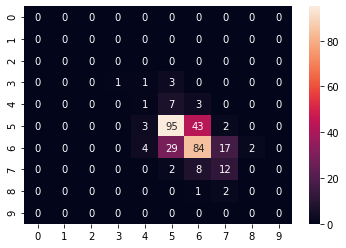

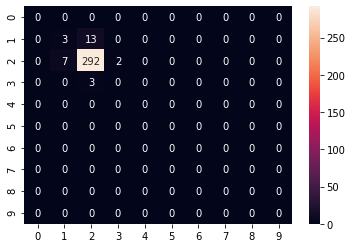

In [27]:
confuzmc_red_quality = confuz(actual_quality_r_test, predictions_red_test)

df_cm_rq = pd.DataFrame(confuzmc_red_quality, range(10), range(10))
sns.heatmap(df_cm_rq, annot=True)
plt.show()


confuzmc_red_Quality = confuz(actual_Quality_r_test, final_predictions_red)

df_cm_rQ = pd.DataFrame(confuzmc_red_Quality, range(10), range(10))
sns.heatmap(df_cm_rQ, annot=True, fmt='g')
plt.show()

In [28]:
# drop correlated features for white wine to see improved accuracy and repeat Naive Bayes
df_white = pd.read_csv('winequality-white1.csv', ';')
actual_quality_w = np.asarray(df_white.quality)
actual_quality_w_test = actual_quality_w[round(len(actual_quality_w)*0.8):] 
actual_Quality_w = np.asarray(df_white.Quality)
actual_Quality_w_test = actual_Quality_w[round(len(actual_Quality_w)*0.8):] 
df_white = df_white.drop(labels='density', axis=1)
df_white = df_white.drop(labels='residual sugar', axis=1)
df_white = df_white.drop(labels='free sulfur dioxide', axis=1)
df_white = df_white.drop(labels='total sulfur dioxide', axis=1)
full_data_w = np.asarray(df_white)
df_white = df_white.drop(labels='quality', axis=1)
df_white = df_white.drop(labels='Quality', axis=1)

In [29]:
w_train = full_data_w[:round(len(full_data_w)*0.6)]
w_valid = full_data_w[round(len(full_data_w)*0.6):round(len(full_data_w)*0.8)]
w_test  = full_data_w[round(len(full_data_w)*0.8):]

separated_w_train = separate(w_train)
summaries_wTrain = calc_summary_stats(w_train)
summary_wTrain = summary_stats_by_class(w_train)

In [30]:
total_rows_white = len(w_train)
summary_w = summary_stats_by_class(w_train)
predictions_white_test = list()
for datapoint in w_test:
    prob_white_train = class_probabilities(summary_w, datapoint)
    best_classValue_w = None
    best_prob_w = -1
    for classValue, prob in prob_white_train.items():
        if best_classValue_w is None or prob > best_prob_w:
            best_prob_w = prob
            best_classValue_w = classValue
    predictions_white_test.append(best_classValue_w)
        
print('\n')
print('Class Probabilites for White Wine:', prob_white_train)
print('\n')
print(predictions_white_test)
print('\n')

# convert predictions_red_test to match 'Quality' column
final_predictions_white = list()
for value in predictions_white_test:
    if value <= 4:
        final_predictions_white.append(1)
    elif 4 < value <= 7:
        final_predictions_white.append(2)
    else:
        final_predictions_white.append(3)
        
print(final_predictions_white)



Class Probabilites for White Wine: {6.0: 3.199782431593758, 5.0: 0.1315450541282772, 7.0: 4.433485035372507, 8.0: 2.2041206858937668, 4.0: 0.02746286685368201, 3.0: 0.00781341047195483, 9.0: 0.1545820241917562}


[7.0, 7.0, 6.0, 6.0, 7.0, 5.0, 5.0, 6.0, 6.0, 7.0, 5.0, 5.0, 7.0, 7.0, 7.0, 6.0, 6.0, 5.0, 6.0, 3.0, 7.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 5.0, 5.0, 8.0, 7.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 5.0, 7.0, 7.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 7.0, 6.0, 7.0, 7.0, 7.0, 7.0, 5.0, 5.0, 7.0, 7.0, 7.0, 7.0, 5.0, 5.0, 6.0, 7.0, 7.0, 7.0, 5.0, 6.0, 5.0, 5.0, 7.0, 6.0, 5.0, 5.0, 5.0, 5.0, 7.0, 7.0, 7.0, 7.0, 5.0, 7.0, 6.0, 6.0, 5.0, 5.0, 6.0, 5.0, 6.0, 5.0, 5.0, 5.0, 4.0, 6.0, 6.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 7.0, 7.0, 5.0, 7.0, 6.0, 5.0, 5.0, 7.0, 5.0, 7.0, 7.0, 7.0, 5.0, 5.0, 7.0, 5.0, 7.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 5.0, 5.0,

In [31]:
conf_mat_white = confusion_matrix(actual_quality_w_test, predictions_white_test) 
print('\n')
print('White Wine')
print ('Confusion Matrix :')
print(conf_mat_white) 
print ('Accuracy Score :',accuracy_score(actual_quality_w_test, predictions_white_test)) 
print ('Report : ')
print (classification_report(actual_quality_w_test, predictions_white_test)) 

conf_mat_white = confusion_matrix(actual_Quality_w_test, final_predictions_white) 
print('\n')
print('White Wine')
print ('Confusion Matrix :')
print(conf_mat_white) 
print ('Accuracy Score :',accuracy_score(actual_Quality_w_test, final_predictions_white)) 
print ('Report : ')
print (classification_report(actual_Quality_w_test, final_predictions_white)) 



White Wine
Confusion Matrix :
[[  0   0   0   1   0   0]
 [  0   5   7  11   2   0]
 [  5   4 132 101  24   0]
 [  2   5  79 224 199   8]
 [  0   2  15  36  93   5]
 [  0   0   8   1   8   3]]
Accuracy Score : 0.4663265306122449
Report : 
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.31      0.20      0.24        25
           5       0.55      0.50      0.52       266
           6       0.60      0.43      0.50       517
           7       0.29      0.62      0.39       151
           8       0.19      0.15      0.17        20

    accuracy                           0.47       980
   macro avg       0.32      0.32      0.30       980
weighted avg       0.52      0.47      0.48       980



White Wine
Confusion Matrix :
[[  5  21   0]
 [ 18 903  13]
 [  0  17   3]]
Accuracy Score : 0.9295918367346939
Report : 
              precision    recall  f1-score   support

           1       0.22      0.19    

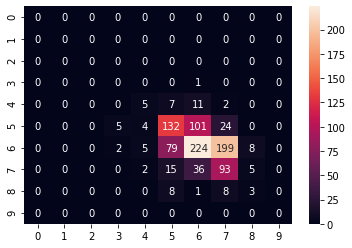

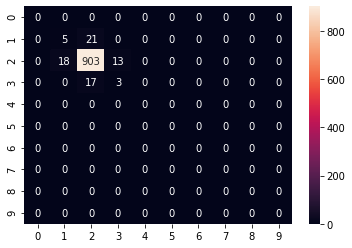

In [32]:
confuzmc_white_quality = confuz(actual_quality_w_test, predictions_white_test)

df_cm_wq = pd.DataFrame(confuzmc_white_quality, range(10), range(10))
sns.heatmap(df_cm_wq, annot=True, fmt='g')
plt.show()


confuzmc_white_Quality = confuz(actual_Quality_w_test, final_predictions_white)

df_cm_wQ = pd.DataFrame(confuzmc_white_Quality, range(10), range(10))
sns.heatmap(df_cm_wQ, annot=True, fmt='g')
plt.show()